In [4]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import scipy.stats as stats


In [7]:
df=pd.read_csv("loans.csv",index_col="client_id")
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [6]:
df.describe()

,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,3.217156
std,4172.891992,0.499338,581.826222,2.397168
min,559.000000,0.000000,10009.000000,0.010000
25%,4232.500000,0.000000,10507.500000,1.220000
50%,8320.000000,1.000000,11033.000000,2.780000
75%,11739.000000,1.000000,11526.000000,4.750000
max,14971.000000,1.000000,11991.000000,12.620000


In [6]:
df.shape

(443, 7)

In [7]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [ ]:
#converting loan_id to object,repaid to cat,loan_start and loan_end to date

In [8]:
#loan_id
df["loan_id"]=df["loan_id"].astype("object")
#repaid
df["repaid"]=df["repaid"].astype("category")
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [11]:
df.dtypes


loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start             object
loan_end       datetime64[ns]
rate                  float64
loan_sart      datetime64[ns]
dtype: object

In [9]:
df["loan_sart"]=pd.to_datetime(df["loan_start"],format="%Y-%m-%d")
#repaid
df["loan_end"]=pd.to_datetime(df["loan_end"],format="%Y-%m-%d")
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07


In [12]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start             object
loan_end       datetime64[ns]
rate                  float64
loan_sart      datetime64[ns]
dtype: object

In [14]:
df["formated_date"]=df["loan_start"].dt.strftime("%d-%m-%Y")
df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [15]:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [17]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end,loan_sart
count,443,443.0,443.0,443,443,443
unique,4,2.0,443.0,430,428,430
top,home,1.0,10243.0,2007-05-16,2008-08-29 00:00:00,2007-05-16 00:00:00
freq,121,237.0,1.0,2,2,2
first,NaN,NaN,NaN,NaN,2001-08-02 00:00:00,2000-01-26 00:00:00
last,NaN,NaN,NaN,NaN,2017-05-07 00:00:00,2014-11-11 00:00:00


In [18]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
loan_sart      0
dtype: int64

In [19]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07


<Axes: >

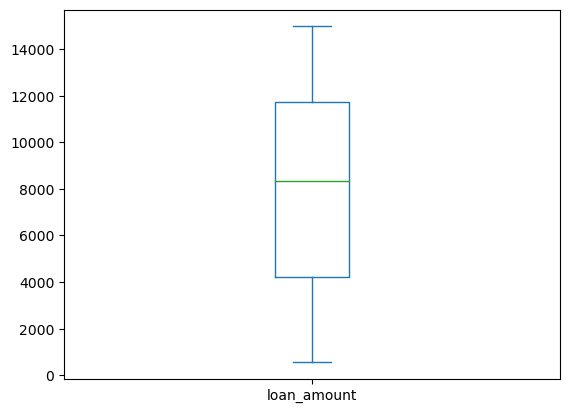

In [20]:
df["loan_amount"].plot(kind="box")

<Axes: >

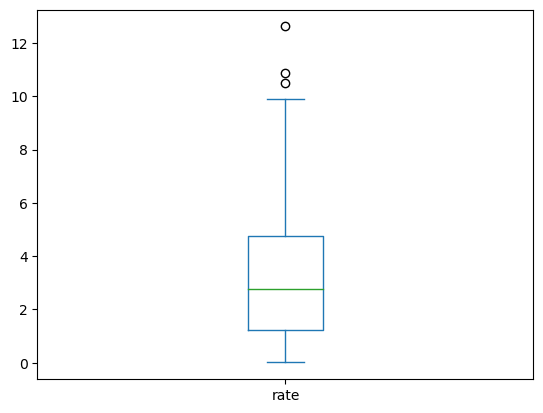

In [21]:
df["rate"].plot(kind="box")

In [23]:
# Transformation
df["sq_rt_rate"]=df["rate"]**0.5
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,sq_rt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,1.769181


In [24]:
df["SQ_RT_rate"]=np.sqrt(df["rate"])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,sq_rt_rate,SQ_RT_rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,1.769181,1.769181


In [25]:
#check skewness and kurtosis
print(f"Skewness of original col is {df.rate.skew()}")
print(f"Skewness of transformed col is {df.SQ_RT_rate.skew()}")

print("---"*25)

print(f"Kurtosis of original col is {df.rate.kurt()}")
print(f"Kurtosis of transformed col is {df.SQ_RT_rate.kurt()}")

Skewness of original col is 0.884204614329943
Skewness of transformed col is 0.04964154055528862
---------------------------------------------------------------------------
Kurtosis of original col is 0.4243716514373652
Kurtosis of transformed col is -0.6318437642052039


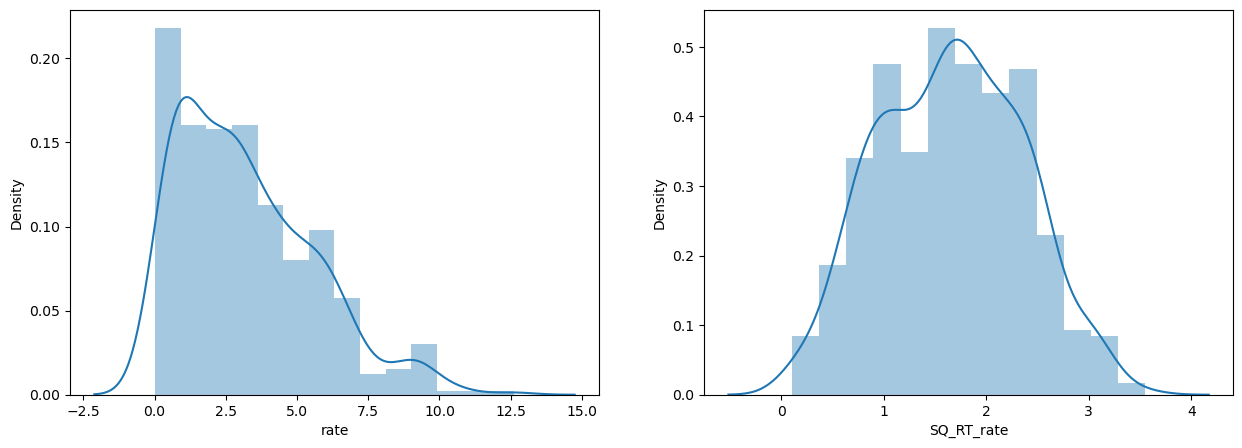

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df["rate"],ax=axes[0])
sns.distplot(df["SQ_RT_rate"],ax=axes[1])
plt.show()

In [27]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,sq_rt_rate,SQ_RT_rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,1.769181,1.769181


In [28]:
df["Log_rate"]=np.log(df["rate"])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,sq_rt_rate,SQ_RT_rate,Log_rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,1.769181,1.769181,1.141033


In [29]:
#check skewness and kurtosis
print(f"Skewness of original col is {df.rate.skew()}")
print(f"Skewness of sqrt transformed col is {df.SQ_RT_rate.skew()}")
print(f"Skewness of log transformed col is {df.Log_rate.skew()}")
print(f"Skewness of log transformed col is {df['Log_rate'].skew()}")

print("---"*25)

print(f"Kurtosis of original col is {df.rate.kurt()}")
print(f"Kurtosis of sqrt transformed col is {df.SQ_RT_rate.kurt()}")
print(f"Kurtosis of log transformed col is {df.Log_rate.kurt()}")


Skewness of original col is 0.884204614329943
Skewness of sqrt transformed col is 0.04964154055528862
Skewness of log transformed col is -1.5943217626331552
Skewness of log transformed col is -1.5943217626331552
---------------------------------------------------------------------------
Kurtosis of original col is 0.4243716514373652
Kurtosis of sqrt transformed col is -0.6318437642052039
Kurtosis of log transformed col is 4.157026150198228


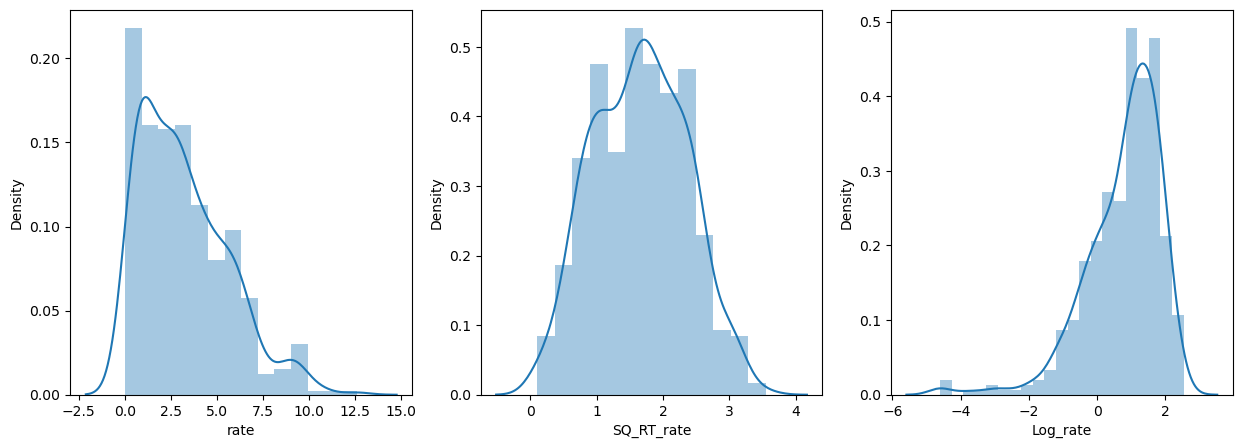

In [30]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(df["rate"],ax=axes[0])
sns.distplot(df["SQ_RT_rate"],ax=axes[1])
sns.distplot(df["Log_rate"],ax=axes[2])

plt.show()

In [31]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,sq_rt_rate,SQ_RT_rate,Log_rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,1.769181,1.769181,1.141033


In [14]:
#remove outlier = Z-score
df["Z_score_values"]=stats.zscore(df["rate"])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,Z_score_values
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,-0.036399


In [15]:
#using lower and upper limit
df[(df["Z_score_values"]<-3 ) | (df["Z_score_values"]>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,Z_score_values
client_id,,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,2005-11-10,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,2003-02-02,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,2009-03-14,3.926916


In [16]:
df2=df[(df["Z_score_values"]>-3 ) & (df["Z_score_values"]<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,Z_score_values
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,-0.036399


In [35]:
df2.shape

(440, 13)

In [36]:
df.shape

(443, 12)

In [37]:
#IQR

Q1=df2.rate.quantile(0.25)
Q2=df2.rate.quantile(0.50)
Q3=df2.rate.quantile(0.75)



In [39]:
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
lower_limit,upper_limit

(-3.9762499999999994, 9.87375)

In [17]:
df2[(df2["rate"]<lower_limit) | (df2["rate"]>upper_limit)].reset_index()


NameError: name 'lower_limit' is not defined

In [41]:
df3=df2[(df2["rate"]>lower_limit) & (df2["rate"]<upper_limit)]
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,sq_rt_rate,SQ_RT_rate,Log_rate,Z_score_values
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,1.466288,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,1.118034,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,0.824621,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,1.113553,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,1.769181,1.769181,1.141033,-0.036399


In [42]:
df3.shape

(439, 13)

In [18]:
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_sart,Z_score_values
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002-04-16,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2003-10-21,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2006-02-01,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2010-12-08,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2010-07-07,-0.036399


TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'